In [51]:


from google.colab import drive
drive.mount('/content/drive')

# Define the path to the CSV file
notebook_path = "/content/drive/MyDrive/Colab Notebooks/"

import os
os.chdir(notebook_path)
!pwd
print(os.getcwd())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks


# Simple Linear Regression

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [ ]:
data= pd.read_csv(notebook_path + 'Simple_linear_regression.csv')
data.head()

In [ ]:
data.describe()

In [60]:
y = data['GPA']
X = data ['SAT']

In [ ]:
plt.scatter(X,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [65]:

X = data['SAT'].values.reshape(-1, 1)  # Reshape to a 2D array

y = data['GPA']

In [66]:

model = LinearRegression()

model.fit(X, y)

LinearRegression()

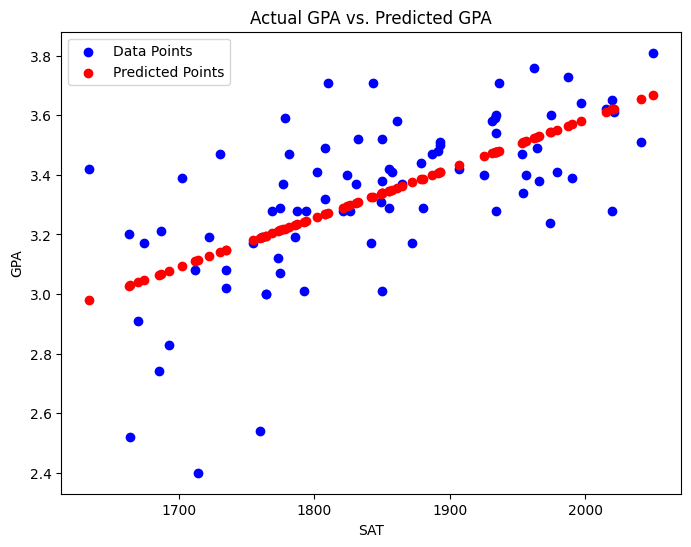

In [68]:
# Plotting
plt.figure(figsize=(8, 6))

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.scatter(X, y, color="blue", label="Data Points")
plt.scatter(X, y_pred, color="red", label="Predicted Points")

plt.title("Actual GPA vs. Predicted GPA")
plt.legend()

plt.show()

In [ ]:
# Calculate the coefficient of determination (R-squared)
r_sq = model.score(X, y)

# Print the results
print(f"Coefficient of determination: {r_sq}")
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

# Make predictions
y_pred = model.predict(X)
print(f"Predicted response:\n{y_pred}")

# Plotting
plt.figure(figsize=(8, 6))

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.scatter(X, y, color="blue", label="Data Points")
plt.scatter(X, y_pred, color="red", label="Predicted Points")

# Plotting the regression line
plt.plot(X, y_pred, color='green', linewidth=2, label='Regression Line')

plt.title("Linear Regression: GPA vs. SAT")
plt.legend()

plt.show()

In [ ]:
# Make predictions using model.predict()
y_pred = model.predict(X)
print(f"Predicted response using model.predict():\n{y_pred}")

# Manually compute predictions using the equation of linear regression
y_pred_eq = model.intercept_ + model.coef_ * X
print(f"Predicted response using the equation:\n{y_pred_eq}")

# Check if the predictions are equal
print(np.allclose(y_pred, y_pred_eq))  # Check if predictions are close within a tolerance

# Print the differences between the two sets of predictions
print(f"Differences between predictions:\n{np.abs(y_pred - y_pred_eq)}")


# Multiple Linear Regression

In [73]:
# Generate synthetic data
np.random.seed(0)  # For reproducibility

# Define the number of samples
num_samples = 100

# Define the number of features
num_features = 3

# Generate features (X) and target variable (y)
X = np.random.randn(num_samples, num_features)

# Generate coefficients for the features
true_coefficients = np.random.randn(num_features)

# Generate some random noise
noise = 0.1 * np.random.randn(num_samples)

# Generate the target variable using the formula: y = X * true_coefficients + noise
y = np.dot(X, true_coefficients) + noise

# Display the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (100, 3)
Shape of y: (100,)


In [ ]:
print(X)
print(y)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
r_sq = model.score(X, y)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

In [ ]:
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

# Manually compute prediction using equation
y_pred_eq = model.intercept_ + np.sum(model.coef_ * X, axis = 1).reshape((-1, 1))
print(f"predicted response:\n{y_pred_eq}")

print(np.abs(y_pred - y_pred_eq) < 0.0000001)

In [79]:
import plotly.graph_objects as go

scatter_points = go.Scatter3d(
                              x = X[:, 0],
                              y = X[:, 1],
                              z = y.reshape(-1),
                              mode = 'markers',
                              marker = {"size": 5, "color": "blue"},
                              name = 'Data Points'
                             )

scatter_points_pred = go.Scatter3d(
                              x = X[:, 0],
                              y = X[:, 1],
                              z = y_pred.reshape(-1),
                              mode = 'markers',
                              marker = {"size": 5, "color": "red"},
                              name = 'Predicted Points'
                             )

coef0 = model.intercept_
coef1 = model.coef_.squeeze()[0]
coef2 = model.coef_.squeeze()[1]

mesh_X1, mesh_X2 = np.meshgrid(np.linspace(0, 100, 10),
                               np.linspace(0, 100, 10))
mesh_y = model.intercept_ + (coef1 * mesh_X1 + coef2 * mesh_X2)

surface_plane = go.Surface(x = mesh_X1, y = mesh_X2, z = mesh_y,
                           opacity = 0.7, colorscale = 'Viridis',
                           showscale = False,
                           name = 'Fitted Plane')

fig = go.Figure(data = [scatter_points, scatter_points_pred, surface_plane])

title_text = "y = (%0.3f) + (%0.3f) X1 + (%0.3f) X2 [R^2 = %0.3f]" % (coef0, coef1, coef2, r_sq)

fig.update_layout(scene = {"xaxis_title": "X1",
                           "yaxis_title": "X2",
                           "zaxis_title": "y"},
                  width = 720,
                  height = 600,
                  scene_camera = { "eye": {"x": -1, "y": -1.5, "z": 1.5} },
                  title = {"text": title_text,
                           "font": {"size": 20},
                           "x": 0.5,
                           "xanchor": "center"
                          }
                 )

fig.show()

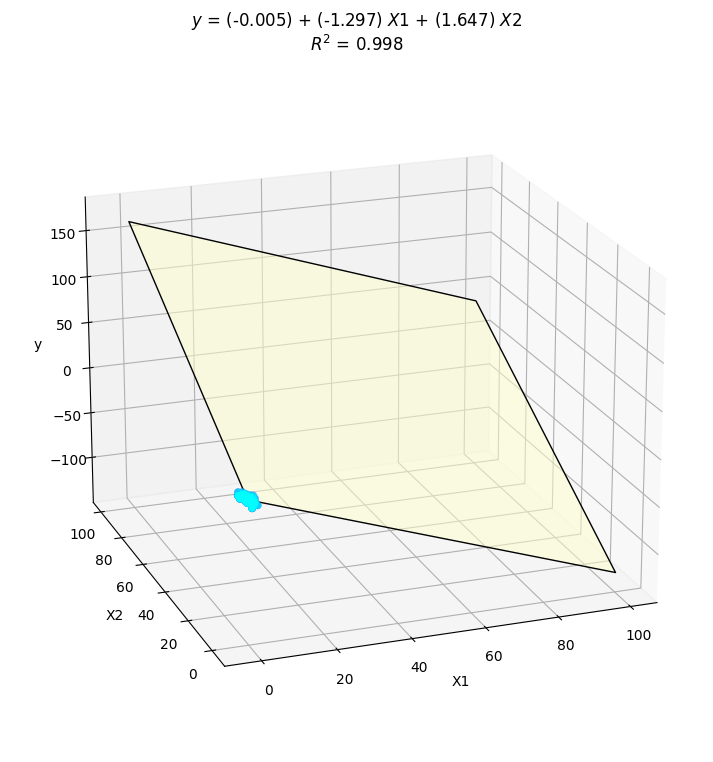

In [80]:
from matplotlib import cm

fig = plt.figure(figsize=(18, 9))

ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev = 20, azim =250)
ax.scatter(X[:, 0], X[:, 1], y,
           c = "blue", marker = "o", label = "Data Points")

ax.scatter(X[:, 0], X[:, 1], y_pred,
           c = "cyan", marker = "o", label = "Predicted Points")

coef0 = model.intercept_
coef1 = model.coef_.squeeze()[0]
coef2 = model.coef_.squeeze()[1]

mesh_X1, mesh_X2 = np.meshgrid(np.linspace(0, 100, 10),
                               np.linspace(0, 100, 10))
mesh_y = model.intercept_ + (coef1 * mesh_X1
                           + coef2 * mesh_X2)

ax.plot_surface(mesh_X1, mesh_X2, mesh_y,
                alpha=0.5, rstride=100, cstride=100, cmap = 'YlOrRd',
                edgecolors='k')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
title_text = "$y$ = (%0.3f) + (%0.3f) $X1$ + (%0.3f) $X2$\n$R^2$ = %0.3f" % (coef0, coef1, coef2, r_sq)
ax.set_title(title_text)

plt.show()

# Polynomial Linear Regression

In [82]:
np.random.seed(0)
n_samples = 100
X1 = np.random.rand(n_samples) * 10
X2 = np.random.rand(n_samples) * 5
X3 = np.random.rand(n_samples) * 3
Y = 2 * X1 + 3 * X2 + 5 * X3 + np.random.randn(n_samples) * 3

In [ ]:
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y})
data.head()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(data['X1'], data['Y'])
axs[0].set_title('X1 vs Y')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('Y')
axs[1].scatter(data['X2'], data['Y'])
axs[1].set_title('X2 vs Y')
axs[1].set_xlabel('X2')
axs[1].set_ylabel('Y')
axs[2].scatter(data['X3'], data['Y'])
axs[2].set_title('X3 vs Y')
axs[2].set_xlabel('X3')
axs[2].set_ylabel('Y')
plt.show()

In [86]:
X = data[['X1', 'X2', 'X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [88]:
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [1.80527746 2.68157344 4.82187977]
Intercept: 1.660673038682397


In [89]:
y_pred = model.predict(X_test)

In [90]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10.541095542161816


In [ ]:
print("\nMultiple Linear Regression Model:")
print("Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2 + {:.2f}*X3".format(intercept, coefficients[0], coefficients[1], coefficients[2]))
print("\nInterpretation of coefficients:")
print("- The coefficient for X1 is {:.2f}, which means that for each one unit increase in X1, Y increases by {:.2f} units, holding X2 and X3 constant.".format(coefficients[0], coefficients[0]))
print("- Similarly, for X2 and X3.")

Method 1 : Polynomial Feature : `include_bias=False`

In [93]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [94]:
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

LinearRegression()

In [95]:
coefficients_poly = model_poly.coef_

In [96]:
y_pred_poly = model_poly.predict(X_poly_test)

In [97]:
mse_poly = mean_squared_error(y_test, y_pred_poly)

In [98]:
print("\nMultiple Linear Regression Model with Polynomial Features:")
print("Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2 + {:.2f}*X3 + {:.2f}*X1^2 + {:.2f}*X2^2 + {:.2f}*X3^2".format(
    model_poly.intercept_, coefficients_poly[0], coefficients_poly[1], coefficients_poly[2],
    coefficients_poly[3], coefficients_poly[4], coefficients_poly[5]))
print("\nMean Squared Error with Polynomial Features:", mse_poly)


Multiple Linear Regression Model with Polynomial Features:
Y = 6.33 + 1.86*X1 + 0.32*X2 + 1.87*X3 + -0.00*X1^2 + 0.02*X2^2 + -0.06*X3^2

Mean Squared Error with Polynomial Features: 13.598718936417137


Method 2: Polynomial Features: `include_bias = True`

In [99]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


In [100]:
model_poly_bias = LinearRegression(fit_intercept = False)
model_poly_bias.fit(X_poly_train, y_train)

LinearRegression(fit_intercept=False)

In [101]:
# Getting the coefficients
coefficients_poly_bias = model_poly_bias.coef_

# Making predictions on the test set
y_pred_poly_bias = model_poly_bias.predict(X_poly_test)

# Calculating the Mean Squared Error
mse_poly_bias = mean_squared_error(y_test, y_pred_poly_bias)

In [102]:
# Explaining the model to the students
print("\nMultiple Linear Regression Model with Polynomial Features (without bias):")
print("Y = {:.2f}*X1 + {:.2f}*X2 + {:.2f}*X3 + {:.2f}*X1^2 + {:.2f}*X2^2 + {:.2f}*X3^2".format(
    coefficients_poly_bias[0], coefficients_poly_bias[1], coefficients_poly_bias[2],
    coefficients_poly_bias[3], coefficients_poly_bias[4], coefficients_poly_bias[5]))
print("\nMean Squared Error with Polynomial Features (without bias):", mse_poly_bias)


Multiple Linear Regression Model with Polynomial Features (without bias):
Y = 6.33*X1 + 1.86*X2 + 0.32*X3 + 1.87*X1^2 + -0.00*X2^2 + 0.02*X3^2

Mean Squared Error with Polynomial Features (without bias): 13.598718936417143
